In [1]:
# This cell imports all the dependencies that we require.
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook
import pandas as pd
from keras.utils import np_utils
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# This is the conventional python function for fizzbuzz generation.
def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

In [3]:
'''Summary:
    This function creates the input data, generates the labels for the same, and then saves that data in a CSV file
    so that it can later be used as training or test data, depending on what we want it to generate.
''' 
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    ''' Beacuse python lists are open ended which helps in appending data to it dynamically 
    and also maintains indexes which facilitates conversion to pandas series or dataframe object later'''
    inputData   = [] 
    outputData  = []
    
    # Why do we need training Data?
    '''Because a machine learning model needs data to learn from and to recognize patterns from that. Once those patterns are
     learned by the model and gets tuned/optimized accordingly, it can then make predictions on unseen data.'''
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    '''A Dataframe represents data in a tabular form and has an inbuilt .csv function that facilitates creation 
    of labelled data in csv format.'''
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

In [4]:
def processData(dataset):
    
    # Why do we have to process?
    '''Because we need to convert data into a format from which our model can depict patterns and learn. Similarly, 
    we convert the class labels as digits which enables us to use one-hot encoding that helps in calculation of loss functin and accuracy later'''
    
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [5]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        '''Because we are converting the decimal number into a 10 digit binary number as 10 digits are sufficient to represent all 
        decimal numbers <= 1000'''
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [6]:
def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

In [7]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


In [8]:
# Read Dataset
trainingData = pd.read_csv('training.csv')
testingData  = pd.read_csv('testing.csv')

# Process Dataset
processedTrainingData, processedTrainingLabel = processData(trainingData)
processedTestingData, processedTestingLabel   = processData(testingData)

## GRAPH BUILDING

##### A detailed explaination of graph building is provided in the cell that defines the graph2 (which is our most accurate model)

In [9]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph = tf.Graph()
with graph.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)





In [10]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 300
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph1 = tf.Graph()
with graph1.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)

    #validation_layer1 = tf.nn.relu(tf.matmul(tf_validation_dataset,hidden_layer1_weights)+hidden_layer1_biases)
    #validation_prediction = tf.argmax(tf.nn.softmax(tf.matmul(validation_layer1,output_layer_weights)+output_layer_biases))




In [11]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 300
NUM_HIDDEN_NEURONS_LAYER_2 = 300
LEARNING_RATE = 0.05

graph2 = tf.Graph()    # Instantiate a graph instance.
with graph2.as_default():  # Makes graph2 as the default graph.
    '''
    we initialize input and output tensors as placeholders. A placeholder initialization just reserves
    the memory space as per the data type and shape of data, whose actual values will be provided later via feed dictionary.
    This enables us to supply different data sets or data batches for training or testing at runtime.
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    
    ''' We use the tf.variable to create variable tensors(tensors whose values can be changed) to store weights 
    because the value of weights need to be updated by the optimizer during training'''
    
    # Below, we initialize the weights of first hidden layer to a 10x300 matrix of random values from a normal distribution with standard deviation of 0.01.  
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    # We also initialize the bias units for hidden layer to a zero vector(tensor) whose length is equal the number of nodes in that layer
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    # Here we initialize the weights of second hidden layer to a 300x300 matrix of random values from a normal distribution with standard deviation of 0.01.  
    hidden_layer2_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,NUM_HIDDEN_NEURONS_LAYER_2],stddev=0.01))
    hidden_layer2_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_2))
    
    # Here we initialize the weights of the output layer to a 300x4 matrix of random values from a normal distribution with standard deviation of 0.01.  
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_2,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
     
    ''' We use the relu as activation functin for each layer. For any input value x,relu produces a value max(0,x).
        Each hidden layer node computes the RELU of matrix multiplication of weights and the corresponding input from the previous layers, 
        as we build a fully connected neural network. The values thus produced act as inputs for the next layer.
    '''
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    hidden_layer2_values = tf.nn.relu(tf.matmul(hidden_layer1_values,hidden_layer2_weights)+hidden_layer2_biases)
    logits = tf.matmul(hidden_layer2_values,output_layer_weights)+output_layer_biases
    # Logits are the values that are produced by the output nodes. 
    # After applying softmax function on them, they produce probabilities which determine the class to which that input data belongs. The selected class is the one with highest probability  
    # The loss function determines the error between the predicted value and the actual value, using the cross entropy function in this case.
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    # In order to train the model, we run the optimizer(gradient descent in this case with a learning rate of 0.5).
    # By training, we mean that the optimizer updates the values of weights and biases for every layer till the most optimal values are reached. 
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    # this function chooses the class by choosing the index of the class for which the softmax yields the highest probability.
    prediction = tf.argmax(tf.nn.softmax(logits),1)

    



### Choosing different optimization methods.

In [12]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_adagrad = tf.Graph()
with graph_adagrad.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.AdagradOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)

In [13]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_adam = tf.Graph()
with graph_adam.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)

In [14]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_adadelta = tf.Graph()
with graph_adadelta.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.AdadeltaOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)

In [15]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_rmsprop = tf.Graph()
with graph_rmsprop.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.RMSPropOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)

### Choosing different Activation functions

In [16]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_sigmoid = tf.Graph()
with graph_sigmoid.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.sigmoid(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)


In [17]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_tanh = tf.Graph()
with graph_tanh.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.tanh(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)



In [18]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_leaky_relu = tf.Graph()
with graph_leaky_relu.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.leaky_relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)



### Adding Dropout

In [102]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_drop = tf.Graph()
with graph_drop.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    #regularization_param = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    drop1 = tf.nn.dropout(hidden_layer1_values,0.5)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)




In [14]:
# Build graph
NUM_HIDDEN_NEURONS_LAYER_1 = 100
LEARNING_RATE = 0.05

# Initializing the weights to Normal Distribution
#def init_weights(shape):
 #   return tf.Variable(tf.random_normal(shape,stddev=0.01))


graph_dropout_exp = tf.Graph()
with graph_dropout_exp.as_default():
    '''tf_train_dataset = tf.placeholder(tf.float32,shape = X_train.shape)
    tf_train_labels = tf.placeholder(tf.float32,shape = train_labels.shape)
    '''
    inputTensor  = tf.placeholder(tf.float32, [None, 10])
    outputTensor = tf.placeholder(tf.float32, [None, 4])
    #tf_validation_dataset = tf.constant(X_cv,dtype=tf.float32)
    #tf_validation_labels = tf.constant(cv_labels,dtype=tf.float32)
    dropout = tf.placeholder(tf.float32)
    
    hidden_layer1_weights = tf.Variable(tf.random_normal([10,NUM_HIDDEN_NEURONS_LAYER_1],stddev=0.01))
    hidden_layer1_biases = tf.Variable(tf.zeros(NUM_HIDDEN_NEURONS_LAYER_1))
    
    output_layer_weights = tf.Variable(tf.random_normal([NUM_HIDDEN_NEURONS_LAYER_1,4],stddev=0.01))
    output_layer_biases = tf.Variable(tf.zeros(4))
    
    hidden_layer1_values = tf.nn.relu(tf.matmul(inputTensor,hidden_layer1_weights)+hidden_layer1_biases)
    drop1 = tf.nn.dropout(hidden_layer1_values,0.5)
    logits = tf.matmul(hidden_layer1_values,output_layer_weights)+output_layer_biases
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=outputTensor))
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    prediction = tf.argmax(tf.nn.softmax(logits),1)





### Running the graphs in a Session


In [15]:
# Refered from stack overflow. This function is the float version of python's range() which operates on integers only
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [17]:
NUM_OF_EPOCHS = 5000
BATCH_SIZE = 128

training_accuracy = []
loss_list = []
with tf.Session(graph=graph_dropout_exp) as sess:
    for d in frange(0.1,1,0.1):
        # Set Global Variables ?
        tf.global_variables_initializer().run()

        for epoch in tqdm_notebook(range(NUM_OF_EPOCHS)):

            #Shuffle the Training Dataset at each epoch
            p = np.random.permutation(range(len(processedTrainingData)))
            processedTrainingData  = processedTrainingData[p]
            processedTrainingLabel = processedTrainingLabel[p]

            # Start batch training
            for start in range(0, len(processedTrainingData), BATCH_SIZE):
                end = start + BATCH_SIZE
                sess.run(training, feed_dict={inputTensor: processedTrainingData[start:end], 
                                              outputTensor: processedTrainingLabel[start:end],
                                              dropout: d})
        # Training accuracy for a dropout value in range 0 to 1
        training_accuracy.append(np.mean(np.argmax(processedTrainingLabel, axis=1) ==
                                     sess.run(prediction, feed_dict={inputTensor: processedTrainingData,
                                                                     outputTensor: processedTrainingLabel})))
        loss_list.append(sess.run(loss, feed_dict={inputTensor: processedTrainingData,
                                                                     outputTensor: processedTrainingLabel}))   
    #Testing
    predictedTestLabel = sess.run(prediction, feed_dict={inputTensor: processedTestingData})

In [18]:
loss_list

[0.05522536,
 0.080423586,
 0.0670136,
 0.034748398,
 0.034117058,
 0.076109365,
 0.05384765,
 0.037538256,
 0.057556007,
 0.042204]

In [19]:
training_accuracy

[0.9877777777777778,
 0.9822222222222222,
 0.98,
 0.9955555555555555,
 0.9977777777777778,
 0.9866666666666667,
 0.9944444444444445,
 0.9977777777777778,
 0.9855555555555555,
 0.9944444444444445]

### Plotting loss function against dropout values from 0.1 to 1

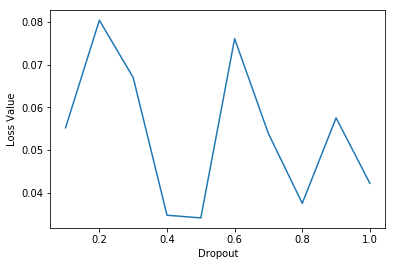

In [20]:
plt.xlabel('Dropout')
plt.ylabel('Loss Value')
plt.plot(list(frange(0.1,1,0.1)),loss_list)

In [12]:
NUM_OF_EPOCHS = 5000
BATCH_SIZE = 128

training_accuracy = []
loss_list = []
with tf.Session(graph=graph2) as sess:
    
    # Set Global Variables ?
    ''' 
        All the variables that we define in a graph get stored in the global scope of that graph. So when we initialize
        the global variables, all the variables get initiliazed to the values specied during their declaration in graph.
        This initializes the values of our weights and biases.
    '''
    tf.global_variables_initializer().run()
    # We run training for the epoch number of times so that we can update the weights enough times to get the most optimum model.  
    for epoch in tqdm_notebook(range(NUM_OF_EPOCHS)):

        #Shuffle the Training Dataset at each epoch
        p = np.random.permutation(range(len(processedTrainingData)))
        processedTrainingData  = processedTrainingData[p]
        processedTrainingLabel = processedTrainingLabel[p]

        # Start batch training. The weights will be updated only after the model process the entire batch of data.
        for start in range(0, len(processedTrainingData), BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(training, feed_dict={inputTensor: processedTrainingData[start:end], 
                                          outputTensor: processedTrainingLabel[start:end]})
        # Training accuracy gets appended to the list after each epoch iteration.
        training_accuracy.append(np.mean(np.argmax(processedTrainingLabel, axis=1) ==
                                     sess.run(prediction, feed_dict={inputTensor: processedTrainingData,
                                                                     outputTensor: processedTrainingLabel})))
    # Testing our model on test data:
    predictedTestLabel = sess.run(prediction, feed_dict={inputTensor: processedTestingData})
    

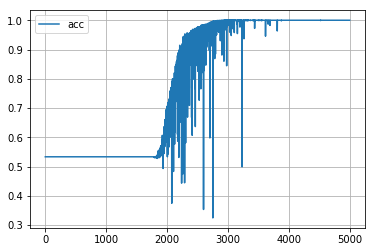

In [43]:
df = pd.DataFrame()
df['acc'] = training_accuracy
df.plot(grid=True)

In [44]:
#This function decodes the labels back to their categorical values as required for the final output format.
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [45]:
wrong   = 0
right   = 0

predictedTestLabelList = []

for i,j in zip(processedTestingLabel,predictedTestLabel):
    predictedTestLabelList.append(decodeLabel(j))
    
    if np.argmax(i) == j:
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

testDataInput = testingData['input'].tolist()
testDataLabel = testingData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "agundroo")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50289721")

predictedTestLabelList.insert(0, "")
predictedTestLabelList.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabelList

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 0  Correct :100
Testing Accuracy: 100.0


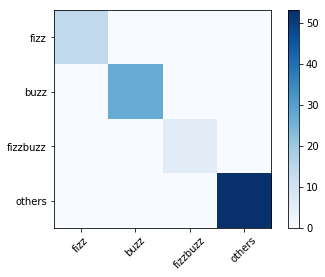

In [47]:
# This block plots the confusion matrix for the test data using our model.
class_names = ['fizz','buzz','fizzbuzz','others']
cnf_matrix = confusion_matrix(testDataLabel[2:], predictedTestLabelList[2:])
plt.imshow(cnf_matrix, interpolation='nearest',cmap=plt.cm.Blues)
tick_marks = np.arange(4)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.colorbar()
